## IPCV: Filter - Übung 1

In [1]:
import cv2
import numpy as np
from matplotlib.pyplot import *

rcParams['figure.dpi']= 200

# Aufgabe 4: Kantendetektion

Verwenden Sie die verschiedenen Filter zur Detektion der Kanten im Bild DIP+MatLab-Gonzalesetal-F04.09a.tif1.
Kommentieren Sie die Resultate und vergleichen Sie mit dem Sitznachbar.

Bild manuell mit dem Laplace Kernel filtern:

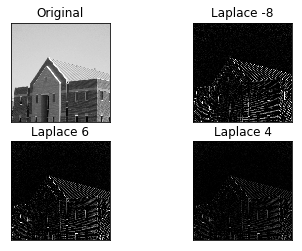

In [2]:
img = cv2.imread('images/gonzales.tif')

laplaceKernel8 = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
laplaceKernel6 = np.array([[0, -1, -1], [-1, 6, -1], [-1, -1, 0]])
laplaceKernel4 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(cv2.filter2D(img, -1, laplaceKernel8)), title("Laplace -8"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(cv2.filter2D(img, -1, laplaceKernel6)), title("Laplace 6"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(cv2.filter2D(img, -1, laplaceKernel4)), title("Laplace 4"), xticks([]), yticks([])
show()


Egal mit welchen Laplace Kernel man bei diesem Bild verwendet, es werden in etwa die gleichen Kanten angezeigt. Beim Kernel mit -8 werden die Kanten am stärksten hervorgehoben und mit Kernel 4 am wenigsten.

Das gleiche mit Sobel Kernel:

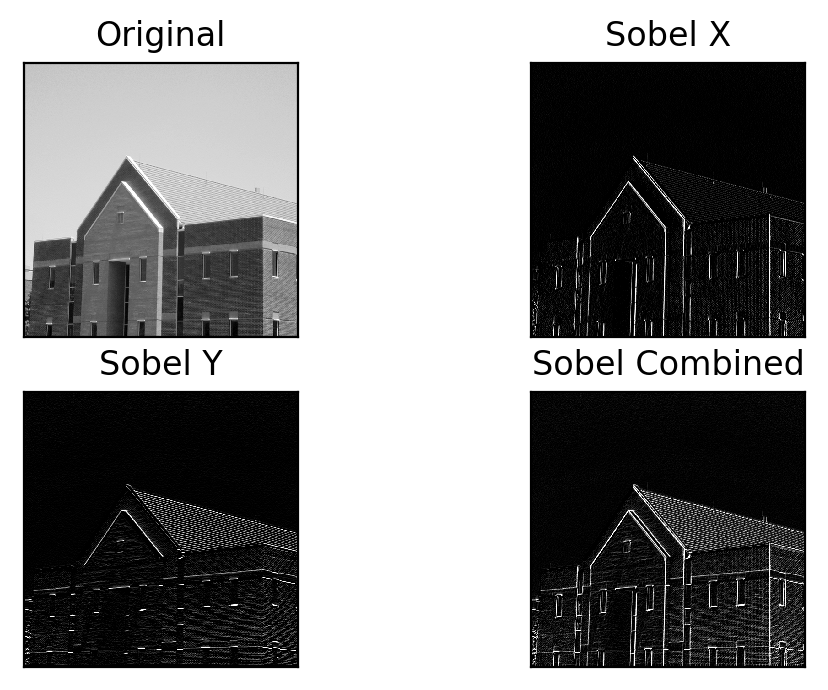

In [3]:
img = cv2.imread('images/gonzales.tif')
#Bildgrösse
rcParams['figure.dpi']= 200

#Je einen Kernel für Horizontale und Vertikale Kanten
sobelKernelY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobelKernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobelX = cv2.filter2D(img, -1, sobelKernelX)
sobelY = cv2.filter2D(img, -1, sobelKernelY)

#Die beiden Bilder können kombiniert werden
sobelCombined = cv2.add(sobelX, sobelY)

subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(sobelX), title("Sobel X"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(sobelY), title("Sobel Y"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(sobelCombined), title("Sobel Combined"), xticks([]), yticks([])
show()

Mit dem Sobel X werden vorallem alle horizontalen Kanten hervorgehoben und mit dem Sobel Y alle vertikalen. Gegenüber zum Laplacefilter werden beim Sobel starke Kanten fester hervorgehoben.

Filter mit OpenCV Funktionen:

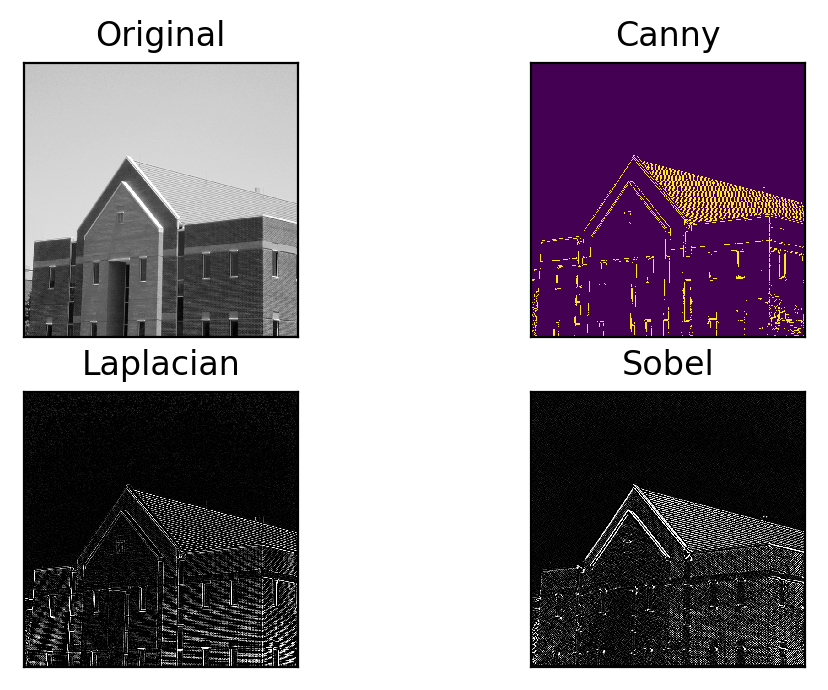

In [4]:
img = cv2.imread('images/gonzales.tif')

edges1 = cv2.Canny(img, 100, 200)
edges2 = cv2.Laplacian(img, -1, ksize=3)
edges3 = cv2.Sobel(img, -1, 1, 1, ksize=5)

rcParams['figure.dpi']= 200
subplot(2, 2, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(2, 2, 2), imshow(edges1), title("Canny"), xticks([]), yticks([])
subplot(2, 2, 3), imshow(edges2), title("Laplacian"), xticks([]), yticks([])
subplot(2, 2, 4), imshow(edges3), title("Sobel"), xticks([]), yticks([])
show()



# Aufgabe 5: Laplacefilter

Wir verbessern nun ein Bild mit dem Laplace-Filter
\begin{align*}
  \Delta f(x,y) \equiv {\nabla}^2 f(x,y) &= \frac{\partial^2 f(x,y)}{\partial x^2}
    + \frac{\partial^2 f(x,y)}{\partial y^2}\nonumber
\end{align*}
wobei $\displaystyle \frac{\partial^2 f(x,y)}{\partial x^2}$
für das zweimalige (partielle) Ableiten von $f(x,y)$ nach $x$ steht.

Eine diskrete Approximation der zweiten Ableitung kann wie folgt
hergeleitet werden: Zuerst wird die erste Ableitung links (bei
$x-1/2$) und rechts (bei $x+1/2)$) des Punktes $(x,y)$ ausgerechnet
\begin{align*}
  \frac{\partial f(x-1/2,y)}{\partial x} &= f(x,y) - f(x-1,y)\\
  \frac{\partial f(x+1/2,y)}{\partial x} &= f(x+1,y) - f(x,y)
\end{align*}
Anschliessend wird die zweite Ableitung als nochmalige
Ableitung der ersten Ableitung berechnet
\begin{align*}
  \frac{\partial^2 f(x,y)}{\partial x^2} &=
    \frac{\partial f(x+1/2,y)}{\partial x}
    - \frac{\partial f(x-1/2,y)}{\partial x}\\
    &= f(x+1,y) - f(x,y) - \left(f(x,y) - f(x-1,y)\right)\\
    &= f(x+1,y) - 2 f(x,y) + f(x-1,y)
\end{align*}
Analog berechnet man die zweite partielle Ableitung
$\displaystyle \frac{\partial^2 f(x,y)}{\partial y^2}$.
Man hat also approximativ
\begin{align*}
  {\nabla}^2 f(x,y)
    &= \left[f(x+1,y) + f(x-1,y) + f(x,y+1) + f(x,y-1) - 4 f(x,y)\right]
\end{align*}

Dem entspricht der folgende Filterkernel


In [5]:
w = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]

Ein auch oft verwendete Filterkernel für den Laplacefilter ist:

In [6]:
w = [[1, 1, 1], [1, -6, 1], [1, 1, 1]]

Oft sind auch die Vorzeichen in anderen Implementationen genau
umgekehrt: das soll aber nicht weiter stören --- es ist reine
Definitionsangelegenheit!

Die Bildverbesserung mit Hilfe eines Laplacefilters basiert auf der
Idee das Inputbild $f(x,y)$ folgendermassen zu ergänzen:
\begin{align*}
  g(x,y) &= f(x,y) + c\left[{\nabla}^2 f(x,y)\right]
\end{align*}
Zum ursprünglichen Bild wird ein Vielfaches (deshalb die Konstante
$c\in\mathbb{R}$) der Kanten/Ecken addiert was das Bild optisch
schärfer wirken lässt.

Wir wollen diese Behauptung mit Hilfe eines Beispiels überprüfen.
Dazu lesen wir das Bild des Mondes ein, spezifizieren den oben
als erstes gezeigten Laplacefilter und bearbeiten das Bild entsprechend:


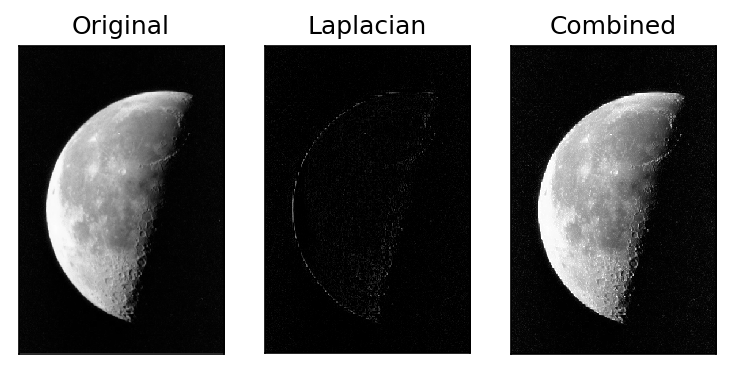

In [7]:
img = cv2.imread('images/moon.jpg')
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
filtered = cv2.filter2D(img, -1, kernel)
combined = cv2.add(img, filtered)

rcParams['figure.dpi']= 150
subplot(1, 3, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(1, 3, 2), imshow(filtered), title("Laplacian"), xticks([]), yticks([])
subplot(1, 3, 3), imshow(combined), title("Combined"), xticks([]), yticks([])
show()


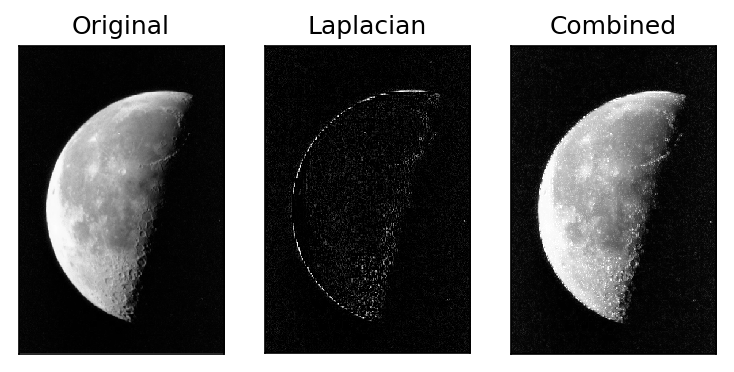

In [8]:
img = cv2.imread('images/moon.jpg')
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
filtered = cv2.filter2D(img, -1, kernel)
combined = cv2.add(img, filtered)

rcParams['figure.dpi']= 150
subplot(1, 3, 1), imshow(img), title("Original"), xticks([]), yticks([])
subplot(1, 3, 2), imshow(filtered), title("Laplacian"), xticks([]), yticks([])
subplot(1, 3, 3), imshow(combined), title("Combined"), xticks([]), yticks([])
show()

Mit dem Kernel -8 werden die Kanten besser hervorgehoben. Der Laplace Filter zeigt im allgemeinen dafür gebraucht um Übergänge stärker hervorzuheben.

# Aufgabe 6: Mask Median Filter

Beim Mask Median Filter wird der Median nicht über alle Pixel des Filterfensters genommen sondern lediglich über die markierten. Dies kann verwendet werden, um beispielsweise vertikale Kratzer zu entfernen. Dazu wird eine counterscratch-Maske verwendet, welche Pixel senkrecht zum Kratzer inkludiert wie die folgende Abbildung zeigt.

![](MaskMedian.png)
Erzeugen Sie im Bild DIP+MatLab-Gonzalesetal-F04.09a.tif einen mehr oder weniger langen und vertikalen Kratzer von 1-2 Pixeln Breite und entfernen Sie diesen mit Hilfe geeigneter MATLAB-Befehle. Schrei- ben Sie die Befehle auf und zeigen Sie das verkratzte Original sowie das verbesserte Bild.

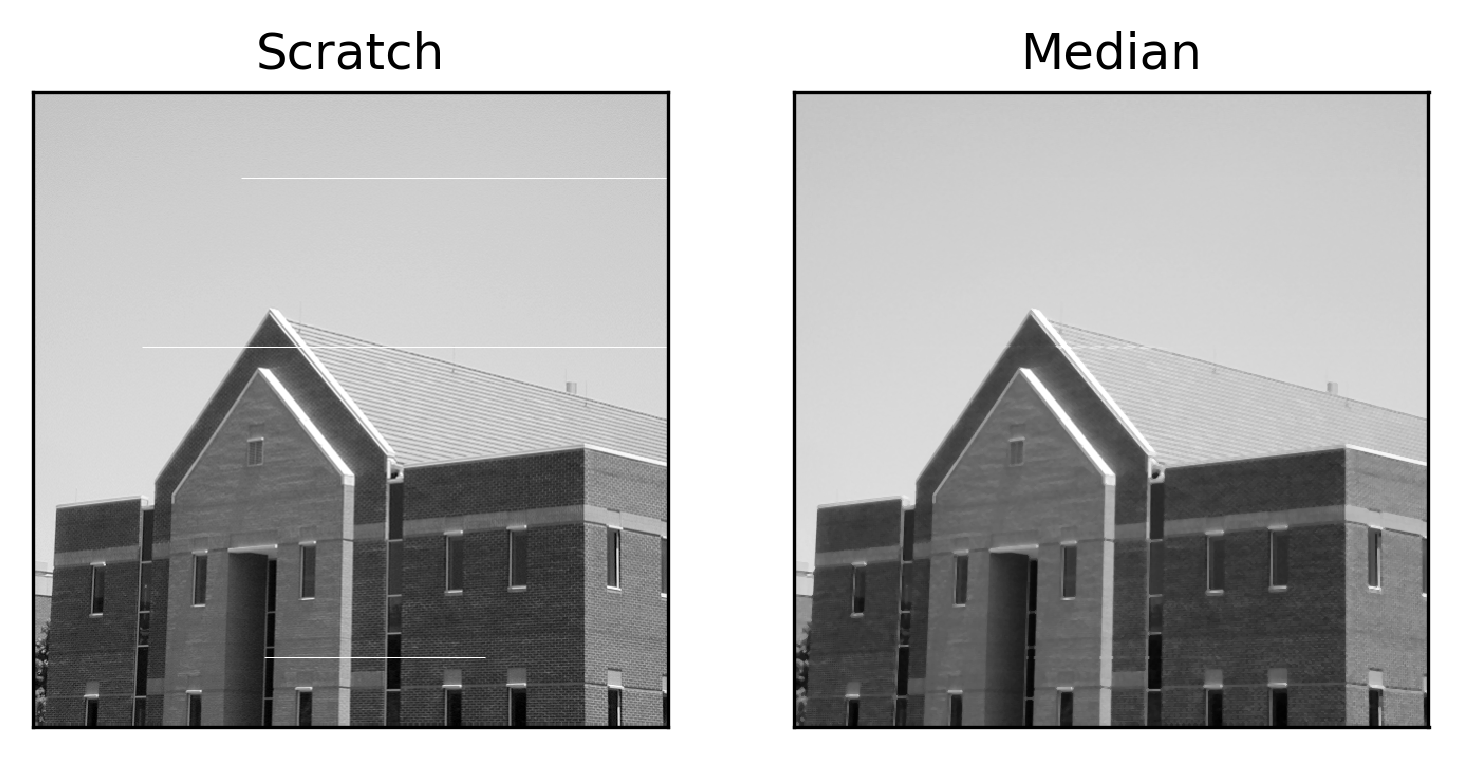

In [9]:
scratch = cv2.imread("images/gonzalesscratch.tif")
blur = cv2.medianBlur(scratch, 3)

rcParams['figure.dpi']= 300
subplot(1, 2, 1), imshow(scratch), title("Scratch"), xticks([]), yticks([])
subplot(1, 2, 2), imshow(blur), title("Median"), xticks([]), yticks([])
show()